# Decision Tree with Python · Airline Survey

Completed by [Anton Starshev](http://linkedin.com/in/starshev) on 23/09/2024

### Context

The airline is interested in predicting whether a future customer would be satisfied with their services given previous customer feedback about their flight experience. The airline would like me, as a consultant, to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

### Data

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others.

### Execution

Imported relevant Python packages.

In [30]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import seaborn as sns

Loaded the dataset.

In [5]:
df_original = pd.read_csv("Invistico_Airline.csv")

Output the first 10 rows of data.

In [7]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Checked the data type of each column, knowing that decision trees expect numeric data. 

In [8]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

Output the unique values in the `Class` column. 

In [9]:
df_original.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In order to predict customer satisfaction, verified if the dataset is imbalanced. To do this, checked the counts of each of the predicted labels. 

In [11]:
df_original.satisfaction.value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

**Observation:** There are 71087 satisfied customers and 58793 dissatisfied customers. Means that 54.7 percent (71087/129880) of customers were satisfied. This value can be compared to a decision tree's model accuracy.

Checked for missing values in the rows of the data.

In [13]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Checked the number of rows and columns in the dataset.

In [14]:
df_original.shape

(129880, 22)

Since the amount of null values is a little percentage of the entire dataset, decided to drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset` for modeling purposes.

In [15]:
df_subset = df_original.dropna().reset_index(drop = True)

Checked that `df_subset` does not contain any missing values.

In [16]:
df_subset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Checked the number of rows and columns in the dataset again.

In [17]:
df_subset.shape

(129487, 22)

As it turned out during EDA, 4 columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Since decision trees need numeric columns, encoded the `Class` column into numeric. 

In [19]:
df_subset.Class = df_subset.Class.map({'Eco' : 1, 'Business' : 3, 'Eco Plus' : 2})

Similarly, assigned `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [20]:
df_subset.satisfaction = df_subset.satisfaction.map({'satisfied' : 1, 'dissatisfied' : 0})

Converted the remaining categorical columns into numeric.

In [21]:
df_subset = pd.get_dummies(df_subset, drop_first = True)

Checked column data types.

In [23]:
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
dtype: obj

Created the training and testing data with 75% for training and the remaining 25% for testing. 

In [24]:
y = df_subset['satisfaction']
x = df_subset.copy()
x = x.drop('satisfaction', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Made a decision tree instance called `decision_tree` and passed in `0` to the `random_state` parameter. Fit the model on the training set, and obtained predictions to the variable. 

In [25]:
model = DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

Printed out the decision tree model's accuracy, precision, recall, and F1 score.

In [26]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, predictions))
print("Precision:", "%.6f" % metrics.precision_score(y_test, predictions))
print("Recall:", "%.6f" % metrics.recall_score(y_test, predictions))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, predictions))

Decision Tree
Accuracy: 0.935438
Precision: 0.942859
Recall: 0.939030
F1 Score: 0.940940


Produced a confusion matrix.

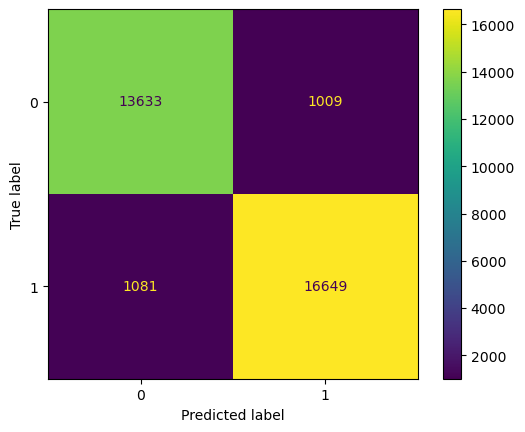

In [27]:
cm = metrics.confusion_matrix(y_test, predictions, labels = model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()

**Observation:** In the confusion matrix, there are a high proportion of true positives and true negatives. The matrix also shows a relatively low number of false positives and false negatives.

Checked the correct order of classes in the model and plotted the decision tree.

In [45]:
model.classes_

array([0, 1])

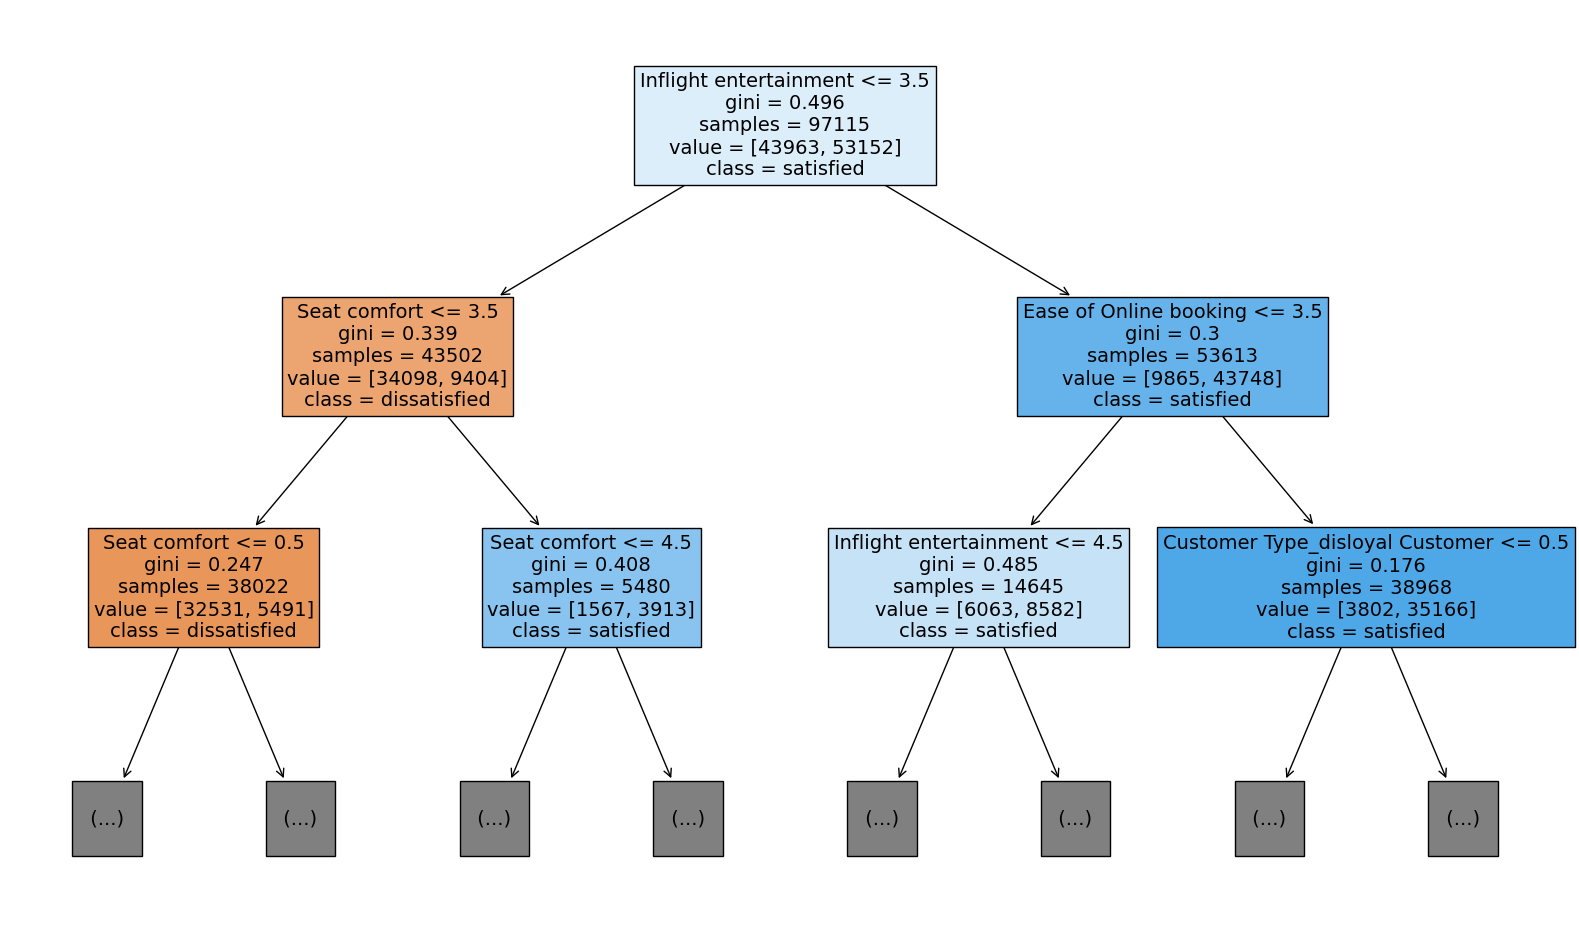

In [43]:
plt.figure(figsize = (20, 12))
plot_tree(model, max_depth = 2, fontsize = 14, feature_names = list(x.columns), filled = True,
         class_names = ['dissatisfied', 'satisfied']);

Determined some values for the hyperparameters `max_depth` and `min_samples_leaf` and metrics to use with grid search and cross validation.

In [51]:
params = {'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50],
             'min_samples_leaf' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50]}

metrics = ['accuracy', 'precision', 'recall', 'f1']

Checked every combination of values to examine which pair has the best evaluation metrics. Made a decision tree instance called `tuned_model` with `random_state = 0`, made a `GridSearchCV` instance called `clf`, made sure to refit the estimator using `"f1"`.

In [52]:
tuned_model = DecisionTreeClassifier(random_state = 0)

clf = GridSearchCV(tuned_model, 
                   params, 
                   scoring = metrics, 
                   cv = 5, 
                   refit = 'f1')

clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Computed the best combination of values for the hyperparameters.

In [53]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2, random_state=0)

**Observation:** according to the GridSearch run, the best combination of values is: maximum depth at 18 and the minimum number of samples at 2.

Computed the best average validation score (f1 metric) of the best model.

In [54]:
clf.best_score_ 

0.9454222910721889

Printed out the decision tree model's accuracy, precision, recall, and f1 score, in a convenient-looking fashion.

In [90]:
def print_results(model_object):
    results = pd.DataFrame(model_object.cv_results_)
    results = results.iloc[[results['mean_test_f1'].idxmax()],:]
    results = results[['param_max_depth', 'param_min_samples_leaf', 'mean_test_accuracy', 
                              'mean_test_precision', 'mean_test_recall', 'mean_test_f1']]
    return results

In [91]:
print_results(clf)

,param_max_depth,param_min_samples_leaf,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1
204,18,2,0.940864,0.955197,0.935863,0.945422


**Observation:** The F1 score for the baseline decision tree model is 0.940940, while the hyperparameter-tuned decision tree achieves an F1 score of 0.945422. Although this ensures overfitting is avoided, the tuning did not significantly improve the model's performance.

Plotted the best decision tree.

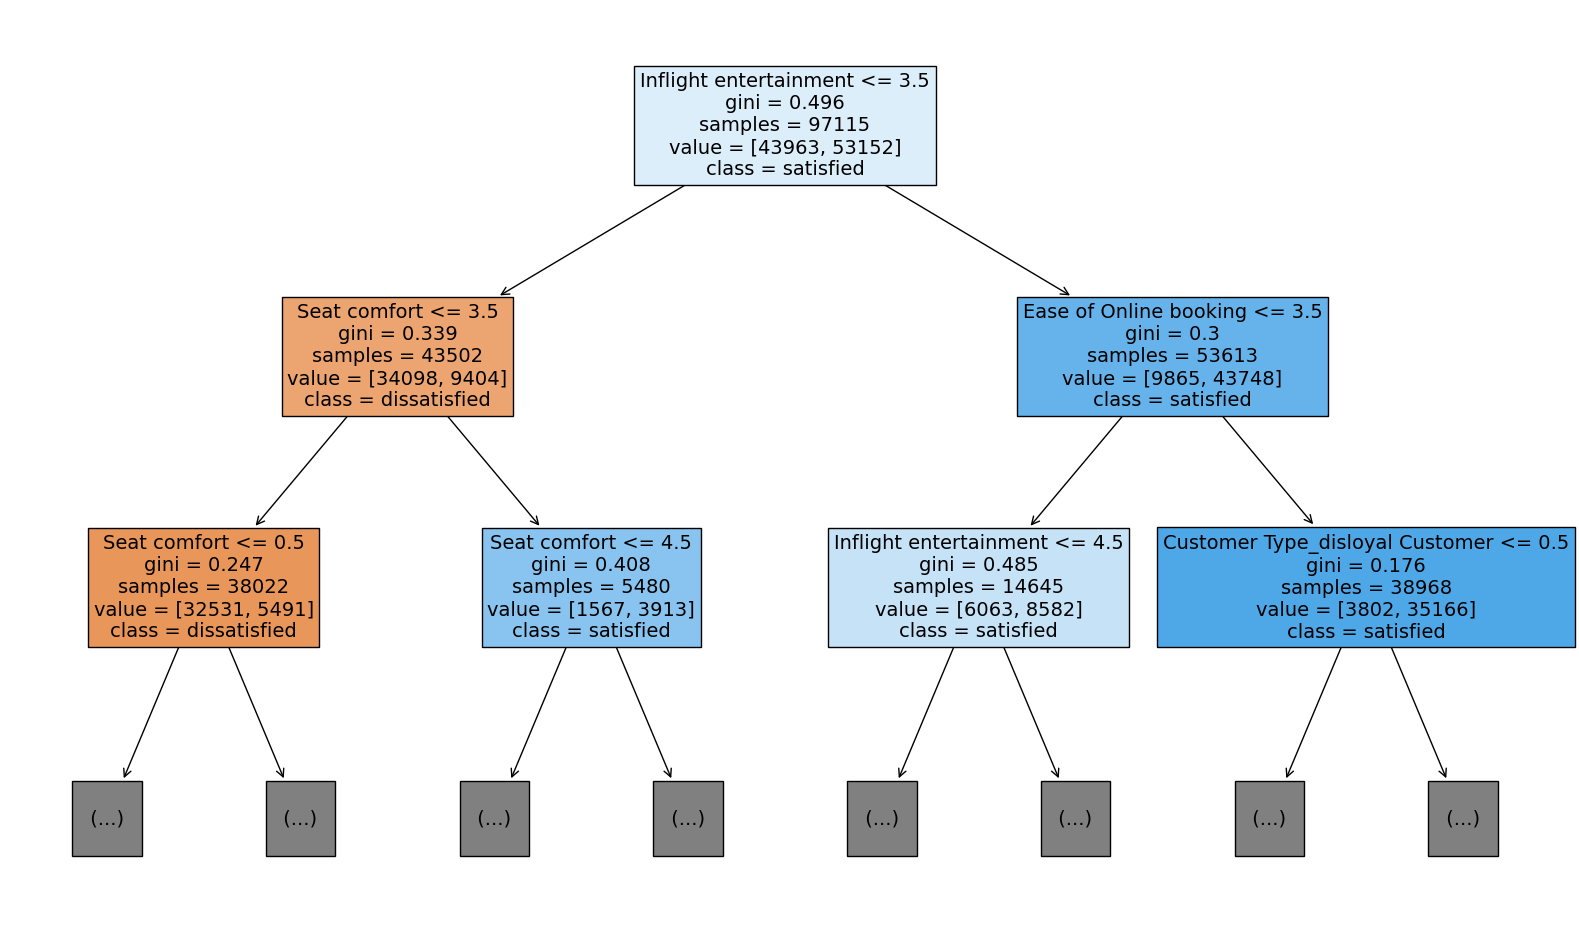

In [93]:
plt.figure(figsize = (20, 12))
plot_tree(clf.best_estimator_, max_depth = 2, fontsize = 14, feature_names = list(x.columns), filled = True,
         class_names = ['dissatisfied', 'satisfied'])
plt.show()

**Observation:** The plot shows that 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are among the most important features.

In [95]:
clf.best_estimator_.feature_importances_

array([0.01843432, 0.02328136, 0.01943613, 0.18827983, 0.02386317,
       0.01471051, 0.02854485, 0.00418122, 0.41966642, 0.01742545,
       0.07050296, 0.00843805, 0.01697164, 0.01200322, 0.01818549,
       0.01667262, 0.01033059, 0.0074659 , 0.0090863 , 0.04704575,
       0.02547422])

Computed feature importance within the best model and showed as a bar chart.

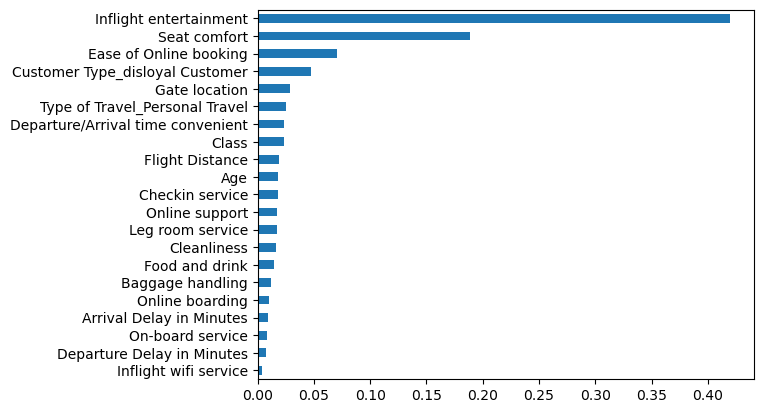

In [104]:
importances = clf.best_estimator_.feature_importances_
importances = pd.Series(importances, index = x.columns).sort_values(ascending = True)

importances.plot(kind = 'barh')
plt.show()

**Observation:** Again, the feature importance graph seems to confirm that 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking' are the most important features for this model.

**Conclusions and considerations:**
*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction. 
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model seemed to be very good at predicting customer satisfaction. 

### Acknowledgment

I would like to express gratitude to Google and Coursera for supporting the educational process and providing the opportunity to refine and showcase skills acquired during the courses by completing real-life scenario portfolio projects, such as this.

### Reference

This is a workplace scenario project proposed within the syllabus of Google Advanced Data Analytics Professional Certificate on Coursera.